In [1]:
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict
from pathlib import Path

directory_ss = "/home/dakur/grid_search_all_configs/ss"
directory_rgb = "/home/dakur/grid_search_all_configs/rgb"
yaml_files_ss = list(Path(directory_ss).rglob("*.yaml"))
yaml_files_rgb = list(Path(directory_rgb).rglob("*.yaml"))

In [5]:
def get_nested_value(dic, key_path):
    """Accede a claves anidadas con formato 'a.b.c'."""
    keys = key_path.split(".")
    for key in keys:
        dic = dic[key]
    return dic

def boxplot_param_vs_val_loss(yaml_paths, parametro):
    data = defaultdict(list)  # clave: valor del parámetro, valor: lista de val_loss

    for path in yaml_paths:
        with open(path, "r") as f:
            config = yaml.safe_load(f)

        try:
            val = get_nested_value(config, parametro)
            val_loss = config["final_validation_loss"]
            if config["dataset"]["semantic_segmentation"] == False and val_loss > 0.2:
                continue
            elif config["dataset"]["semantic_segmentation"] == True and val_loss > 1:
                continue
            data[str(val)].append(val_loss)
        except (KeyError, TypeError):
            #print(f"Saltando {path}, parámetro o val_loss no encontrado.")
            continue

    # Prepara datos para seaborn
    labels, losses = [], []
    for k, v in data.items():
        labels.extend([k] * len(v))
        losses.extend(v)

    sns.boxplot(x=labels, y=losses, showfliers=False)
    sns.stripplot(x=labels, y=losses, jitter=True, color="black", alpha=0.5)
    plt.xlabel(parametro)
    plt.ylabel("final_validation_loss")
    plt.title(f"Boxplot de {parametro} vs val_loss")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# RGB

Total YAML files: 72


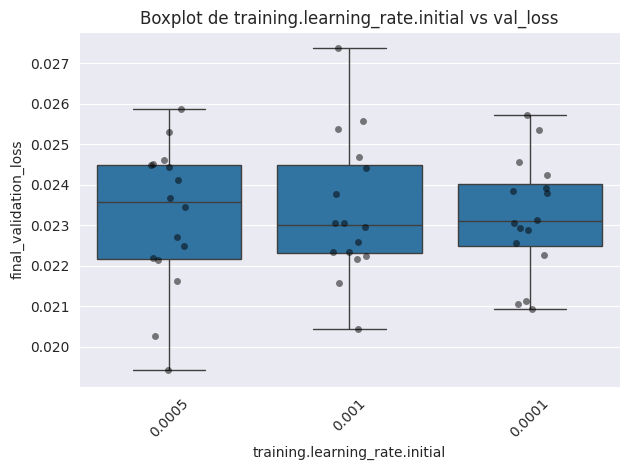

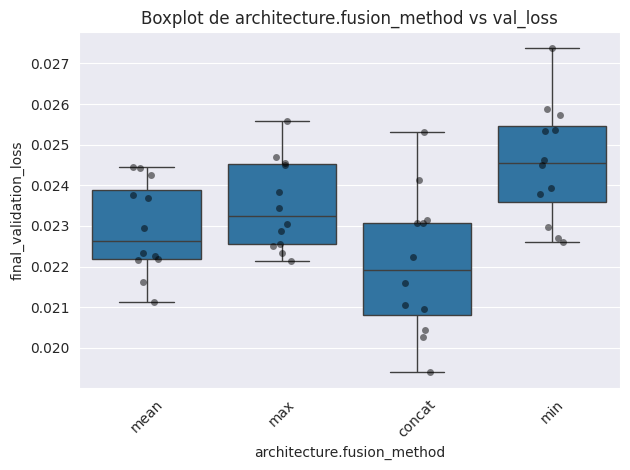

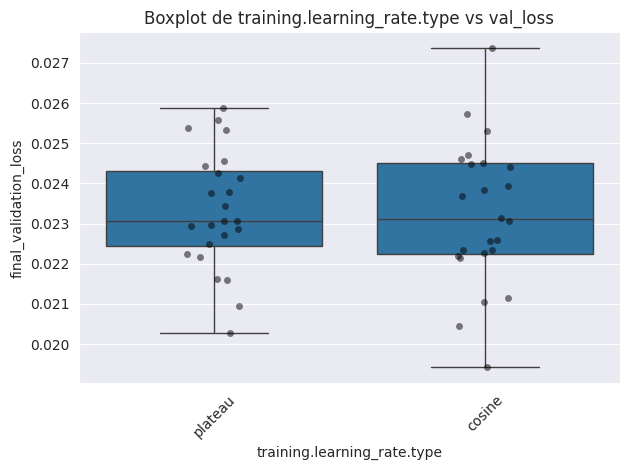

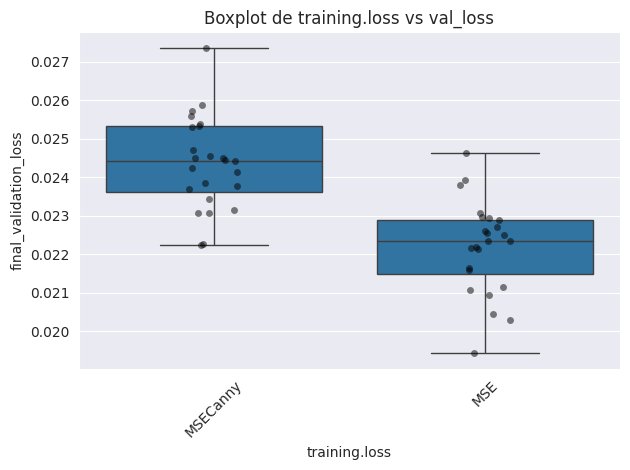

In [6]:
yaml_files = yaml_files_rgb
print(f"Total YAML files: {len(yaml_files)}")
boxplot_param_vs_val_loss(yaml_files, "training.learning_rate.initial")
boxplot_param_vs_val_loss(yaml_files, "architecture.fusion_method")
boxplot_param_vs_val_loss(yaml_files, "training.learning_rate.type")
boxplot_param_vs_val_loss(yaml_files, "training.loss")

Millors paràmetres per RGB:
- Initial Learning Rate: 0.001/0.0001
- Fusion Method: Concatenation
- Learning Rate Scheduler: Plateau/Cosine
- Best Loss: MSE

# Semantic Segmentation

Total de archivos YAML: 52


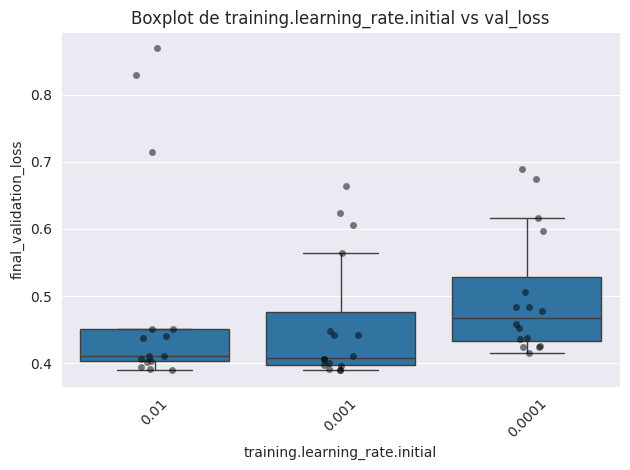

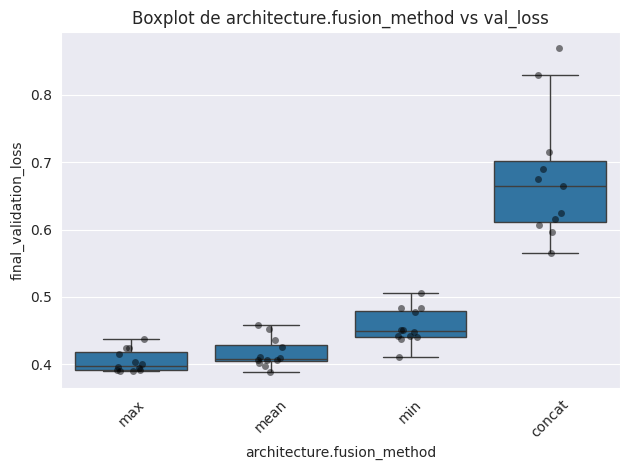

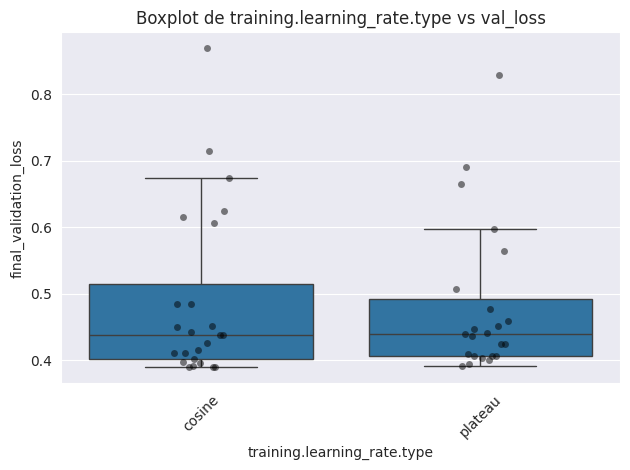

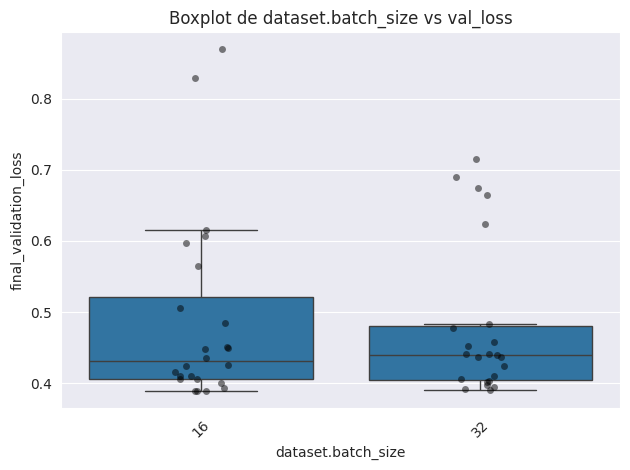

In [7]:
yaml_files = yaml_files_ss
print(f"Total de archivos YAML: {len(yaml_files)}")
boxplot_param_vs_val_loss(yaml_files, "training.learning_rate.initial")
boxplot_param_vs_val_loss(yaml_files, "architecture.fusion_method")
boxplot_param_vs_val_loss(yaml_files, "training.learning_rate.type")
boxplot_param_vs_val_loss(yaml_files, "dataset.batch_size")

Millors paràmetres per Seamntic Segmentation:
- Initial Learning Rate: 0.001/0.01
- Fusion Method: Max
- Learning Rate Scheduler: Plateau/Cosine
- Batch Size: 16